In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import timeit

In [2]:
data_features = np.loadtxt('features.txt', delimiter = ',')
data_target = np.loadtxt('target.txt')

In [3]:
def cost_function(w,b,X,Y):
    val=0
    c=100
    for i in range(len(X)):
            val=val+max(0,1 - Y[i]*(np.dot(w,X[i])+b))
            finalcost=c*val+ 0.5*(np.sum(np.square(w)))
    return finalcost

In [4]:
def batch_gradient_descent():
    b = 0
    eta = 0.0000003
    epsilon = 0.25
    c = 100
    w = np.zeros((1,len(data_features[0])))
    k=0
    change_in_cost = 1
    list_costs = []
    list_costs.append(cost_function(w,b,data_features,data_target))
    while(change_in_cost > epsilon):
        val1=0
        val2=0
        for i in range(len(data_features)):
            if data_target[i]*(np.dot(w,data_features[i])+ b) >= 1:
                val1 += 0
                val2 += 0
            else :
                val1 += -data_target[i]*data_features[i]
                val2 += -data_target[i]
        f_w = w + c*val1
        f_b = c*val2
        w = w - eta*f_w
        b = b - eta*f_b
        list_costs.append(cost_function(w,b,data_features,data_target))
        k = k+1
        change_in_cost = abs(list_costs[-2] - list_costs[-1])/list_costs[-2]*100 
    return (k,list_costs)

In [5]:
start = timeit.default_timer()
k,list_costs = batch_gradient_descent()
end = timeit.default_timer()

In [6]:
print(k)

57


In [7]:
print("total time taken for convergence for batch",(end-start))

total time taken for convergence for batch 21.755243539999995


In [8]:
x_axis_list=[i for i in range(1,59)]

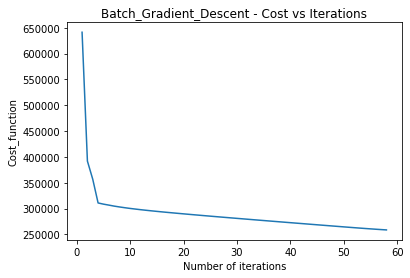

In [9]:
import matplotlib.pyplot as plt
plt.plot(x_axis_list, list_costs) 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost_function') 
plt.title('Batch_Gradient_Descent - Cost vs Iterations') 
plt.show() 

In [10]:
def mini_batch_gradient():
    w = np.zeros((1,len(data_features[0])))
    p,q = shuffle(data_features,data_target)
    k,l,b = 0,0,0
    num = len(data_features)
    eta2 = 0.00001
    epsilon2 = 0.01
    b_size = 20
    c = 100
    list_costs2 = []
    m=cost_function(w,b,data_features,data_target)
    list_costs2.append(m)
    change_in_cost2 = 1
    while(change_in_cost2 > epsilon2):
        oldcost = change_in_cost2
        x = p[l*b_size: min(num, (l+1)*b_size)]
        y = q[l*b_size: min(num, (l+1)*b_size)]
        val1=0
        val2=0
        for i in range(len(x)):
            if y[i]*(np.dot(w,x[i])+ b) >= 1:
                val1 += 0
                val2 += 0
            else :
                val1 += -y[i]*x[i]
                val2 += -y[i]
        f_w = w + c*val1
        f_b = c*val2
        w = w - eta2*f_w
        b = b - eta2*f_b
        n=cost_function(w,b,data_features,data_target)
        list_costs2.append(n)
        k = k+1
        l = int((l+1)%((num+b_size - 1)/b_size))
        cost_perm = abs(list_costs2[-2] - list_costs2[-1])/list_costs2[-2]*100
        change_in_cost2 = (0.5*oldcost + 0.5*cost_perm)
    return (k, list_costs2)

In [11]:
start = timeit.default_timer()
k2,list_costs2 = mini_batch_gradient()
end = timeit.default_timer()

In [12]:
k2

240

In [13]:
print("total time taken for convergence for mini batch",(end-start))

total time taken for convergence for mini batch 63.863428144000004


In [14]:
x_axis_list2=[i for i in range(1,k2+2)]

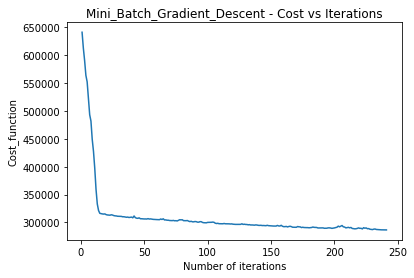

In [15]:
import matplotlib.pyplot as plt
plt.plot(x_axis_list2, list_costs2) 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost_function') 
plt.title('Mini_Batch_Gradient_Descent - Cost vs Iterations') 
plt.show() 

In [16]:
def stochastic_gradient_descent():
    p,q = shuffle(data_features,data_target)
    k,l,b = 0,0,0
    num = len(data_features)
    w = np.zeros((1,len(data_features[0])))
    c = 100
    eta3 = 0.0001
    epsilon3 = 0.001
    list_costs3 = []
    m1=cost_function(w,b,data_features,data_target)
    list_costs3.append(m1)
    change_in_cost3 = 1
    while(change_in_cost3 > epsilon3):
        oldcost = change_in_cost3
        x = p[l: min(num, (l+1))]
        y = q[l: min(num, (l+1))]
        val1=0
        val2=0
        for i in range(len(x)):
            if y[i]*(np.dot(w,x[i])+ b) >= 1:
                val1 += 0
                val2 += 0
            else :
                val1 += -y[i]*x[i]
                val2 += -y[i]
        f_w = w + c*val1
        f_b = c*val2
        w = w - eta3*f_w
        b = b - eta3*f_b
        n1=cost_function(w,b,data_features,data_target)
        list_costs3.append(n1)
        k = k+1
        #print(k)
        l = int(l%num + 1)
        costper = abs(list_costs3[-2] - list_costs3[-1])/list_costs3[-2]*100
        change_in_cost3 = (0.5*oldcost + 0.5*costper)
    return (k, list_costs3)

In [17]:
start = timeit.default_timer()
k3,list_costs3 = stochastic_gradient_descent()
end = timeit.default_timer()

In [18]:
k3

1119

In [19]:
print("total time taken for convergence for stochastic",(end-start))

total time taken for convergence for stochastic 295.088436397


In [20]:
x_axis_list3=[i for i in range(1,k3+2)]

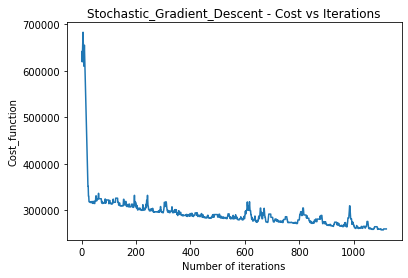

In [21]:
plt.plot(x_axis_list3, list_costs3) 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost_function') 
plt.title('Stochastic_Gradient_Descent - Cost vs Iterations') 
plt.show() 